# Simulation checks: multiple Gaussians


In [1]:
# External modules.
import matplotlib.pyplot as plt
import numpy as np
import os

# Internal modules.
from setup.directories import img_path
from setup.gaussian import MultipleGaussians
from setup.utils import makedir_safe
from setup.results import my_ext

In [2]:
# Create directory to save figures.
makedir_safe(img_path)

In [3]:
# Clerical setup.

## Seed control.
random_seed = 22993514079364 # fixed seed.
#random_seed = np.random.SeedSequence().entropy # uncomment for fresh seeds.

## Random generator (numpy).
rg = np.random.default_rng(random_seed)

## Dataset parameters.
n = 1000
d = 2
data_means = [np.full(shape=(d,), fill_value=0.0), np.full(shape=(d,), fill_value=1.0)]
data_covs = [np.eye(N=d)/10, np.eye(N=d)/10]
data_sizes = [n//2, n//2]
data_noises = [0.0, 0.00]

In [4]:
# Generate the data.
data = MultipleGaussians(rg=rg, means=data_means, covs=data_covs,
                         sizes=data_sizes, noises=data_noises)
data_2 = MultipleGaussians(rg=rg, means=data_means, covs=data_covs,
                         sizes=data_sizes, noises=data_noises)
X, Y = data()
idx_0 = Y == 0
idx_1 = Y == 1
print(type(X), type(Y))
print(X.shape, Y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1000, 2) (1000,)


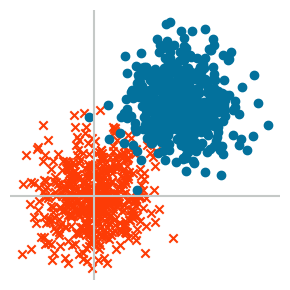

In [5]:
# Visualize the labelled data.
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.axvline(x=0.0, color="xkcd:silver")
ax.axhline(y=0.0, color="xkcd:silver")
ax.scatter(X[idx_0,0], X[idx_0,1], marker="x", color="xkcd:red orange")
ax.scatter(X[idx_1,0], X[idx_1,1], marker="o", color="xkcd:ocean blue")
ax.set_axis_off()
fname = os.path.join(img_path, "sims_gaussian.{}".format(my_ext))
plt.tight_layout()
plt.savefig(fname=fname)
plt.show()

___